In [108]:
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import math

import numpy as np
from sklearn.cluster import KMeans


## K-means

In [24]:
data = pd.read_csv('../ddqn/organized_training_memory4.csv')
data = data[['cart_position', 'cart_velocity', 'pole_angle', 'pole_angular_velocity']]
data

,cart_position,cart_velocity,pole_angle,pole_angular_velocity
0,-0.029321,-0.013128,-0.031011,0.004817
1,-0.029584,-0.207792,-0.030915,0.287557
2,-0.033740,-0.402459,-0.025164,0.570332
3,-0.041789,-0.597220,-0.013757,0.854982
4,-0.053733,-0.792151,0.003343,1.143308
...,...,...,...,...
7941,2.185362,1.588556,0.187633,0.585868
7942,2.217133,1.780623,0.199350,0.357664
7943,2.252745,1.972435,0.206503,0.133865
7944,2.292194,2.164093,0.209181,-0.087232


/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


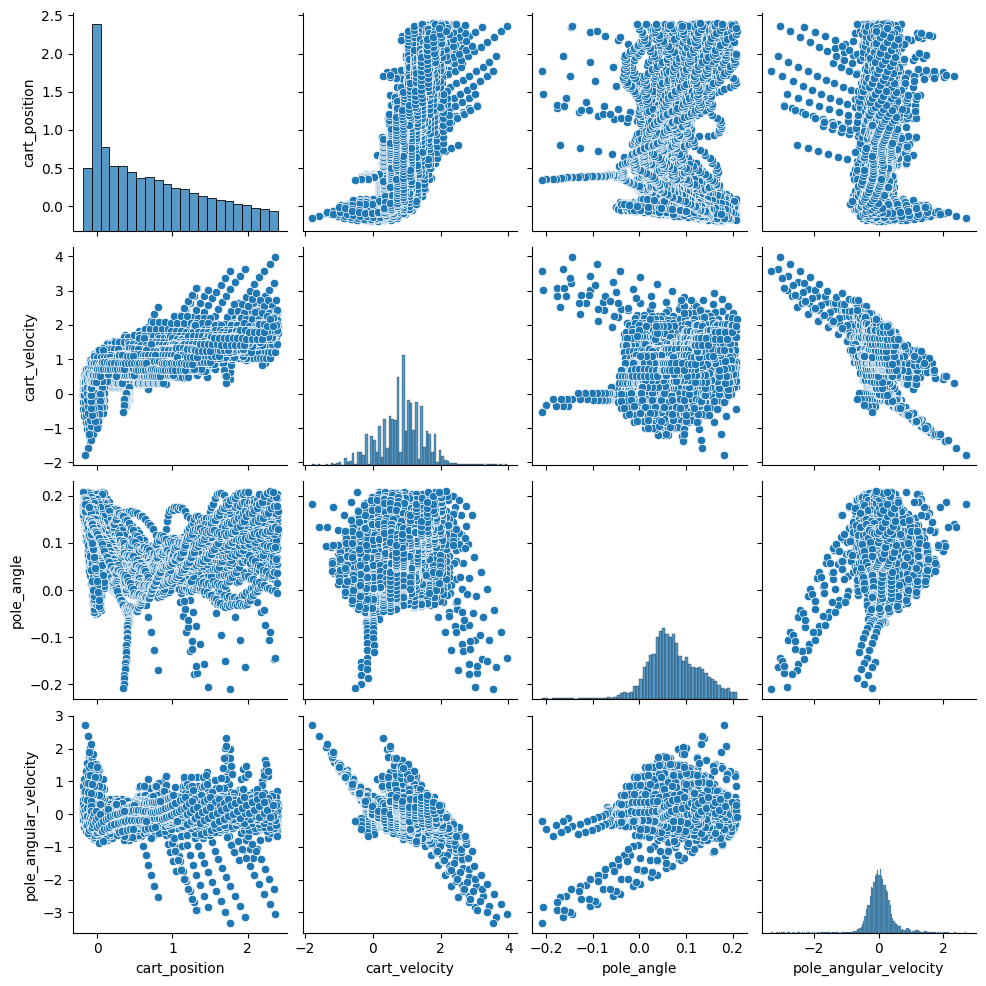

In [25]:
sns.pairplot(data)

/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

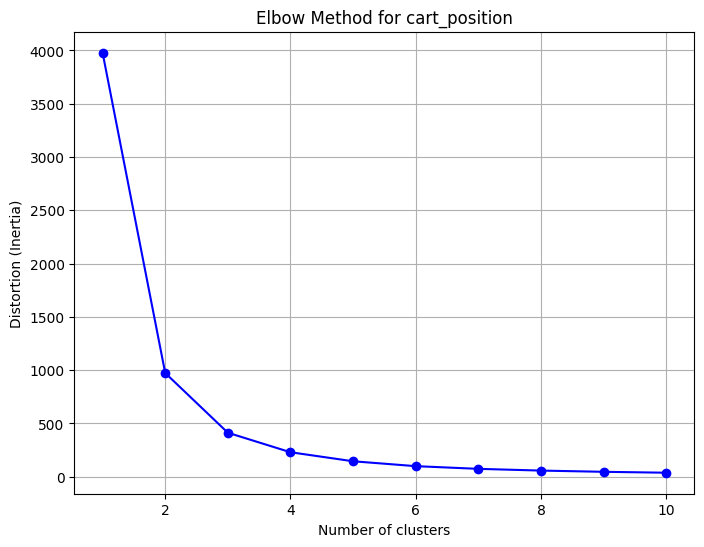

/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

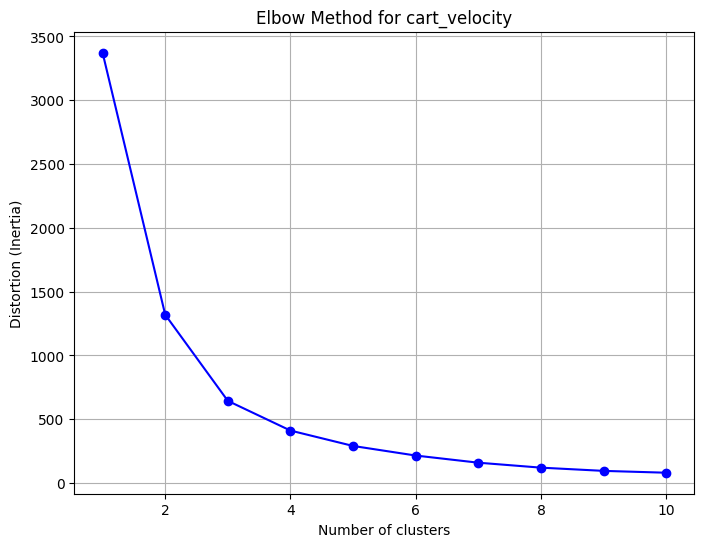

/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

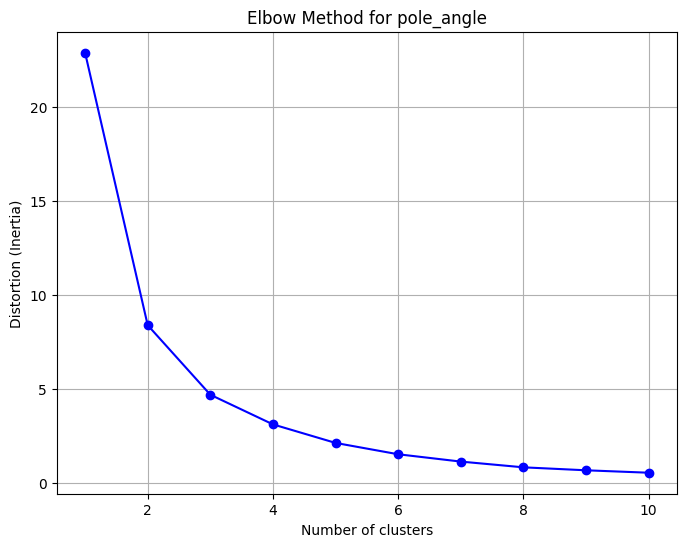

/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

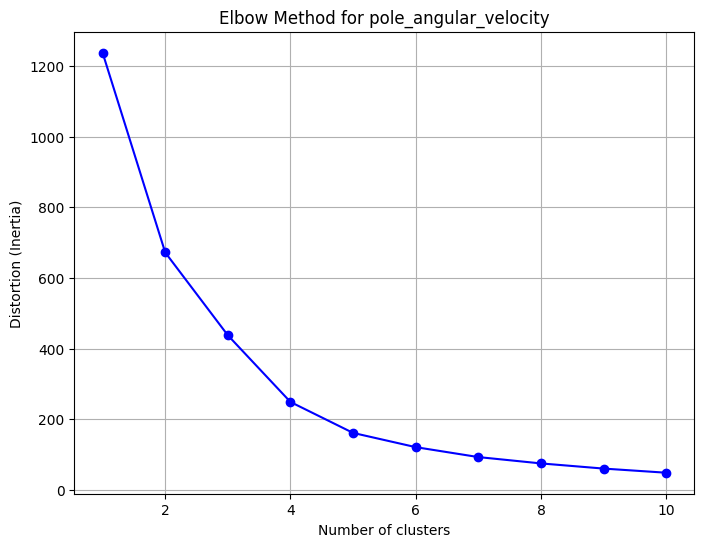

In [66]:
def elbow_method(data, var, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for'+f' {var}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.grid(True)
    plt.show()

    # Return the number of clusters and their corresponding distortions
    return list(range(1, max_clusters + 1)), distortions

col = ['cart_position', 'cart_velocity', 'pole_angle', 'pole_angular_velocity']
for c in col:
    clusters, distortions = elbow_method(data = data[[c]], var = c)


In [120]:
def kmeans_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

bin_df = data.copy()
optimal_num_clusters = 6
for c in col:
    cluster_labels = kmeans_clustering(data[[c]], optimal_num_clusters)
    bin_df[c+'_bin'] = cluster_labels


/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

In [121]:
bin_df

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,cart_position_bin,cart_velocity_bin,pole_angle_bin,pole_angular_velocity_bin
0,-0.029321,-0.013128,-0.031011,0.004817,3,0,3,5
1,-0.029584,-0.207792,-0.030915,0.287557,3,3,3,0
2,-0.033740,-0.402459,-0.025164,0.570332,3,3,3,0
3,-0.041789,-0.597220,-0.013757,0.854982,3,3,4,3
4,-0.053733,-0.792151,0.003343,1.143308,3,3,4,3
...,...,...,...,...,...,...,...,...
7941,2.185362,1.588556,0.187633,0.585868,4,1,2,0
7942,2.217133,1.780623,0.199350,0.357664,4,2,2,0
7943,2.252745,1.972435,0.206503,0.133865,4,2,2,5
7944,2.292194,2.164093,0.209181,-0.087232,4,2,2,4


## Bin Threshold

In [122]:
thre_dic = {}
for c in col:
    var_name = c + '_bin'
    ls = []
    for i in range(optimal_num_clusters):   
        mini = min(list(bin_df[bin_df[var_name] == i][c]))
        ls.append(mini)
    ls = sorted(ls)
    threshold = {}
    for i in range(optimal_num_clusters):
        if i == 0:
            threshold[i] = (-math.inf, ls[i+1])
        elif i < optimal_num_clusters-1:
            threshold[i] = (ls[i], ls[i+1])
        else:
            threshold[i] = (ls[i], math.inf)
    thre_dic[c] = threshold
thre_dic

{'cart_position': {0: (-inf, 0.19151482),
  1: (0.19151482, 0.5827605),
  2: (0.5827605, 0.99993026),
  3: (0.99993026, 1.4370154),
  4: (1.4370154, 1.8976188),
  5: (1.8976188, inf)},
 'cart_velocity': {0: (-inf, -0.065949716),
  1: (-0.065949716, 0.42580238),
  2: (0.42580238, 0.8226055),
  3: (0.8226055, 1.2100412),
  4: (1.2100412, 1.7292192),
  5: (1.7292192, inf)},
 'pole_angle': {0: (-inf, -0.023241995),
  1: (-0.023241995, 0.030279214),
  2: (0.030279214, 0.064454265),
  3: (0.064454265, 0.101545796),
  4: (0.101545796, 0.14655076),
  5: (0.14655076, inf)},
 'pole_angular_velocity': {0: (-inf, -1.2417545),
  1: (-1.2417545, -0.2797363),
  2: (-0.2797363, -0.0077485787),
  3: (-0.0077485787, 0.26337323),
  4: (0.26337323, 0.76528233),
  5: (0.76528233, inf)}}

In [124]:
for c in col:
    var_thre = thre_dic[c]
    ls = []
    for d in list(bin_df[c]):
        for i in range(optimal_num_clusters):
            var_clus_thre = var_thre[i]
            if d <= var_clus_thre[1] and d > var_clus_thre[0]:
                ls.append(i)
    bin_df[c] = ls
bin_df = bin_df[col]
bin_df 

,cart_position,cart_velocity,pole_angle,pole_angular_velocity
0,0,3,1,5
1,0,1,1,5
2,0,1,1,5
3,0,1,5,5
4,0,1,5,5
...,...,...,...,...
7941,5,5,5,5
7942,5,5,5,5
7943,5,5,5,5
7944,5,5,5,5


In [114]:
next_data = pd.read_csv('../ddqn/organized_training_memory4.csv')
new_col = ['new_cart_position', 'new_cart_velocity', 'new_pole_angle', 'new_pole_angular_velocity']
next_data = next_data[new_col]
next_data

,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,-0.029584,-0.207792,-0.030915,0.287557
1,-0.033740,-0.402459,-0.025164,0.570332
2,-0.041789,-0.597220,-0.013757,0.854982
3,-0.053733,-0.792151,0.003343,1.143308
4,-0.069576,-0.597073,0.026209,0.851675
...,...,...,...,...
7941,2.217133,1.780623,0.199350,0.357664
7942,2.252745,1.972435,0.206503,0.133865
7943,2.292194,2.164093,0.209181,-0.087232
7944,2.335476,1.966682,0.207436,0.263481


In [125]:
next_bin = next_data.copy()
for c in col:
    var_new = 'new_'+ c
    var_thre = thre_dic[c]
    ls = []
    for d in list(next_data[var_new]):
        for i in range(optimal_num_clusters):
            var_clus_thre = var_thre[i]
            if d <= var_clus_thre[1] and d > var_clus_thre[0]:
                ls.append(i)
    next_bin[var_new] = ls
next_bin 

,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,0,0,0,4
1,0,0,0,4
2,0,0,1,5
3,0,0,1,5
4,0,0,1,5
...,...,...,...,...
7941,5,5,5,4
7942,5,5,5,3
7943,5,5,5,2
7944,5,5,5,4


In [127]:
bin_df = pd.concat([bin_df, next_bin], axis = 1)
bin_df

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,0,3,1,5,0,0,0,4
1,0,1,1,5,0,0,0,4
2,0,1,1,5,0,0,1,5
3,0,1,5,5,0,0,1,5
4,0,1,5,5,0,0,1,5
...,...,...,...,...,...,...,...,...
7941,5,5,5,5,5,5,5,4
7942,5,5,5,5,5,5,5,3
7943,5,5,5,5,5,5,5,2
7944,5,5,5,5,5,5,5,4


In [128]:
df = pd.read_csv('../ddqn/organized_training_memory4.csv')[['reward', 'action']]
bin_df = pd.concat([bin_df, df], axis=1)
bin_df

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,reward,action
0,0,3,1,5,0,0,0,4,1.0,0
1,0,1,1,5,0,0,0,4,1.0,0
2,0,1,1,5,0,0,1,5,1.0,0
3,0,1,5,5,0,0,1,5,1.0,0
4,0,1,5,5,0,0,1,5,1.0,1
...,...,...,...,...,...,...,...,...,...,...
7941,5,5,5,5,5,5,5,4,1.0,1
7942,5,5,5,5,5,5,5,3,1.0,1
7943,5,5,5,5,5,5,5,2,1.0,1
7944,5,5,5,5,5,5,5,4,1.0,0


In [129]:
bin_df.to_csv('bin_data.csv', index=False) 

## Dagma

In [130]:
import torch
from dagma import utils
from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear

/Users/richtsai1103/bn_dqn/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [132]:
df = pd.read_csv("bin_data.csv")
X = df.values
X

array([[0., 3., 1., ..., 4., 1., 0.],
       [0., 1., 1., ..., 4., 1., 0.],
       [0., 1., 1., ..., 5., 1., 0.],
       ...,
       [5., 5., 5., ..., 2., 1., 1.],
       [5., 5., 5., ..., 4., 1., 0.],
       [5., 5., 5., ..., 3., 0., 1.]])

In [133]:
node_names_dict = {index: column_name for index, column_name in enumerate(df.columns)}
node_names_dict

{0: 'cart_position',
 1: 'cart_velocity',
 2: 'pole_angle',
 3: 'pole_angular_velocity',
 4: 'new_cart_position',
 5: 'new_cart_velocity',
 6: 'new_pole_angle',
 7: 'new_pole_angular_velocity',
 8: 'reward',
 9: 'action'}

In [140]:
eq_model = DagmaMLP(dims=[10, 10, 1], bias=True, dtype=torch.double) # create the model for the structural equations, in this case MLPs
model = DagmaNonlinear(eq_model, dtype=torch.double) # create the model for DAG learning
W_est = model.fit(X, lambda1=0.02, lambda2=0.005) 
W_est

100%|██████████| 230000/230000.0 [1:16:27<00:00, 50.14it/s]    


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.63506519, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.60585628, 0.5477316 , 0.        , 0.        ],
       [2.406647  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33582785, 0.        , 0.        , 0.        ],
       [0.        , 1.2313831 , 0.        , 0.        , 1.33101258,
        0.        , 0.52319141, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.7153404 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.32104638, 0.       

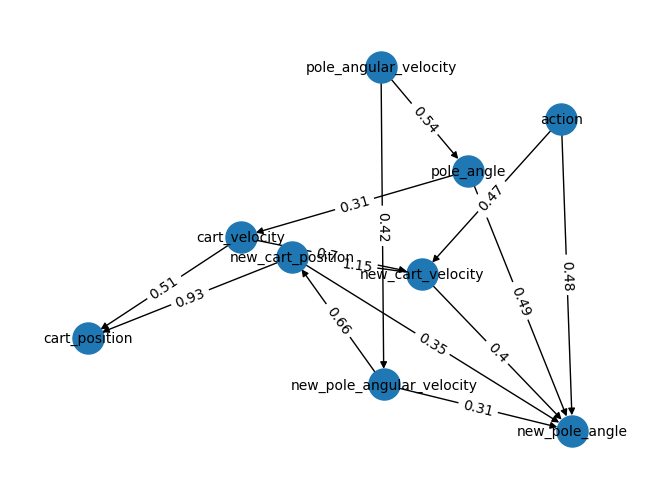

In [139]:
# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add weighted edges based on the adjacency matrix
for row in range(W_est.shape[0]):
    for col in range(W_est.shape[1]):
        weight = W_est.iloc[row, col]
        if weight > 0:
            G.add_edge(row, col, weight=weight)

# Draw the graph
H = nx.relabel_nodes(G, node_names_dict)
pos = nx.spring_layout(H)  # Layout for visualization
edge_labels = {(u, v): d['weight'] for u, v, d in H.edges(data=True)}

# Draw the graph with custom node labels
nx.draw(H, pos, node_size=500, font_size=10, with_labels=True)

# Draw edge labels
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.margins(0.1) 
plt.show()